In [1]:
# Programming Exercise 1 - Extraction of R-R Interval from ECG signal
# =============================================================================
# 2024-08-27 Reto Wildhaber   
# Edited by Sebastian Fernandez
# -----------------------------------------------------------------------------

import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks, decimate

# Background

It is known from physiology that the heart rate and ECG amplitudes are correlated to the respiration
activity of a subject. In this exercise, we apply basic methods to explore this dependencies.
We use an ECG signal recorded in parallel to a nasal flow signal from physionet (see Fig. 1). The nasal
flow signal was recorded with a thermal flow sensor, showing high temperature values on expiration
(see Fig. 2).

![exercise](./ressources/img/exercise1.png)

Filename: apnea-ecg-a01er-data.csv
Number of loaded samples:  6000
Total signal duration [s]:  60.0
Signal shape and samples (6000,) : [[-0.06   0.235]
 [-0.065  0.236]
 [-0.06   0.237]
 ...
 [ 0.04  -0.112]
 [ 0.07  -0.113]
 [ 0.09  -0.115]]


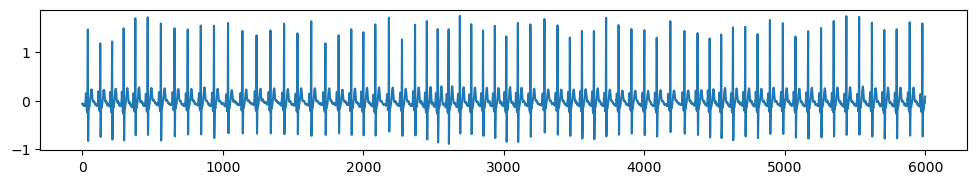

In [2]:
file_name = 'apnea-ecg-a01er-data.csv'
fs = 100  # sampling rate [Hz] of recorded signal
y = np.genfromtxt(file_name, usecols=(1,4), delimiter=r',', skip_header=1, )
y_ecg = y[:,0]
y_resp = y[:,1]
K = len(y)
k = np.arange(K)


# plot signal
fig, axs = plt.subplots(1, 1, sharex='all', figsize=(10, 2))
fig.tight_layout()
axs.plot(k, y_ecg)

print("Filename:", file_name)
print("Number of loaded samples: ",K)
print("Total signal duration [s]: ", K/fs)
print("Signal shape and samples "+str(y_ecg.shape)+" : "+str(y))

In [3]:
print("Filename:", file_name)
print("Number of loaded samples: ",K)  # = here 1 minute
print("Total signal duration [s]: ", K/fs)

Filename: apnea-ecg-a01er-data.csv
Number of loaded samples:  6000
Total signal duration [s]:  60.0


In [4]:
print("Signal shape and samples "+str(y_ecg.shape)+" : "+str(y))

Signal shape and samples (6000,) : [[-0.06   0.235]
 [-0.065  0.236]
 [-0.06   0.237]
 ...
 [ 0.04  -0.112]
 [ 0.07  -0.113]
 [ 0.09  -0.115]]


# Exercise 1-1: ECG RR Intervals

Then: ind_peaks, _ = find_peaks(y_ecg, distance=fs*0.6, height=0.5) uses scipy.signal. find_peaks to identify the locations of QRS peaks in the ECG signal (y_ecg). Here’s what each parameter does:

**y_ecg**: This is the ECG signal in which we want to find peaks (in this case, QRS complexes).

**distance**=fs0.6: This sets a minimum distance between peaks to ensure they aren’t too close together. fs0.6 means that detected peaks must be separated by at least 0.6 seconds. Since fs (sampling rate) is 100 Hz, distance=fs*0.6 translates to a minimum of 60 samples between peaks. This setting helps filter out minor fluctuations and focus on larger peaks like the QRS complexes, which naturally occur less frequently.

**height**=0.5: This sets a minimum amplitude (or “height”) that a peak must exceed to be considered valid. Only peaks with amplitudes greater than or equal to 0.5 (in the given units, likely millivolts for ECG data) are detected. This is helpful for eliminating small fluctuations that don’t represent QRS complexes, which are generally larger peaks in ECG data. The find_peaks function then returns:

**ind_peaks**: An array of indices where peaks (QRS complexes) were detected in y_ecg. _: A dictionary of additional information, including peak heights (if needed). In summary, this line identifies the indices of the main QRS peaks in the ECG signal by setting both a minimum distance (to avoid detecting noise) and a minimum amplitude threshold (to ignore small, irrelevant peaks).

In [5]:
# Find QRS Peaks
#An R wave in an ECG signal is the center, positive peak of a QRS complex.
#Detect the positions of each R wave in the provided signal using find_peaks(...) from scipy.signal.

# find_peaks(y_ecg, distance=fs*0.6, height=0.5)
ind_peaks, _ = find_peaks(y_ecg, height=0.8)  # Adjust parameters as needed
nof_peaks = len(ind_peaks)  # number of peaks found

print("Indices of minima: ",ind_peaks)
print("Total number of peaks found: ",nof_peaks)
if nof_peaks == 0:
    print("No maxima found. Exit.")
    exit() 


Indices of minima:  [  39  127  212  294  377  465  559  656  750  843  937 1037 1139 1240
 1339 1436 1531 1629 1730 1824 1914 2000 2085 2182 2275 2368 2452 2529
 2607 2687 2768 2852 2936 3017 3100 3189 3289 3382 3470 3556 3641 3728
 3817 3908 4000 4088 4185 4285 4379 4465 4547 4631 4718 4806 4894 4986
 5076 5166 5258 5348 5438 5529 5620 5708 5796 5889 5979]
Total number of peaks found:  67


In [13]:
# Get QRS amplitudes for detected R peaks
y_QRS = y_ecg[ind_peaks[1:]]     # remove one so both are 66 elements long
print("R-Peak Amplitudes [mV]:", y_QRS)

R-Peak Amplitudes [mV]: [1.185 1.22  1.495 1.7   1.72  1.595 1.495 1.47  1.55  1.545 1.605 1.44
 1.35  1.45  1.59  1.39  1.64  1.185 1.35  1.475 1.415 1.575 1.715 1.265
 1.57  1.645 1.48  1.475 1.75  1.58  1.45  1.545 1.33  1.605 1.575 1.685
 1.555 1.305 1.44  1.44  1.71  1.56  1.48  1.455 1.3   1.64  1.44  1.395
 1.285 1.365 1.515 1.525 1.375 1.665 1.6   1.325 1.435 1.5   1.645 1.745
 1.73  1.61  1.46  1.475 1.62  1.595]


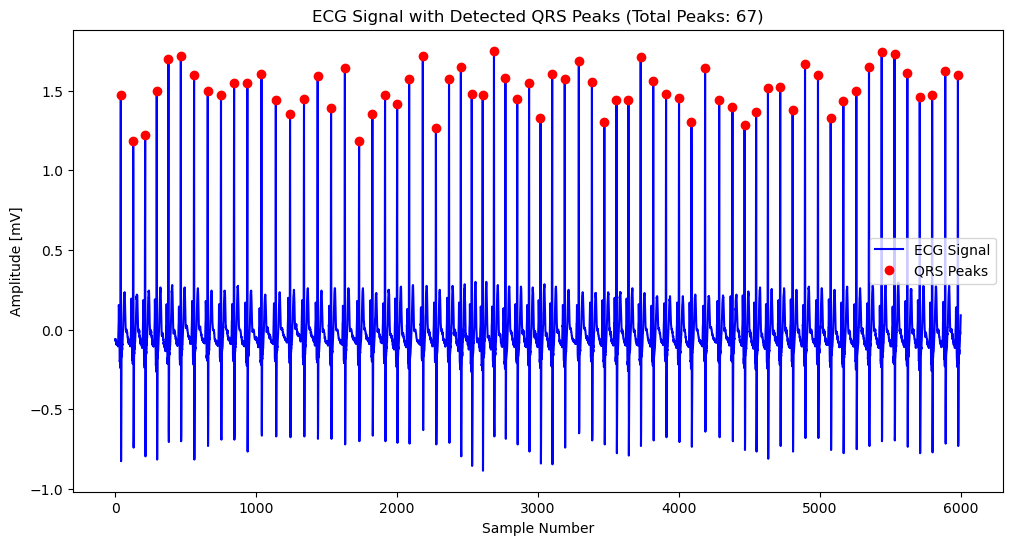

In [12]:
# Plot the ECG signal
plt.figure(figsize=(12, 6))
plt.plot(y_ecg, label='ECG Signal', color='blue')

# Plot the QRS peaks
plt.plot(ind_peaks, y_ecg[ind_peaks], 'ro', label='QRS Peaks')  # 'ro' makes red dots at the peaks

# Labels and legend
plt.title(f"ECG Signal with Detected QRS Peaks (Total Peaks: {nof_peaks})")
plt.xlabel("Sample Number")
plt.ylabel("Amplitude [mV]")
plt.legend()

plt.show()

# RR-interval

The R-R interval is the time interval **between two consecutive R-waves** (peaks) in the electrocardiogram (ECG) signal. 
It is a crucial parameter in cardiac studies as it reflects the **time between two successive heartbeats**

In [9]:
# Compute R-R intervals in seconds
# Calculate the R-R intervals from the detected R peaks, i.e., the time between two consecutive R’s
rr_interval_in_s = np.diff(ind_peaks) / fs  # Divide by fs to convert indices to time in seconds, takes the interval between two consequtive peaks

print("R-R Intervals [s]: ", rr_interval_in_s)

R-R Intervals [s]:  [0.88 0.85 0.82 0.83 0.88 0.94 0.97 0.94 0.93 0.94 1.   1.02 1.01 0.99
 0.97 0.95 0.98 1.01 0.94 0.9  0.86 0.85 0.97 0.93 0.93 0.84 0.77 0.78
 0.8  0.81 0.84 0.84 0.81 0.83 0.89 1.   0.93 0.88 0.86 0.85 0.87 0.89
 0.91 0.92 0.88 0.97 1.   0.94 0.86 0.82 0.84 0.87 0.88 0.88 0.92 0.9
 0.9  0.92 0.9  0.9  0.91 0.91 0.88 0.88 0.93 0.9 ]


In [8]:
# Create a time vector for the R-R intervals
# The time for the intervals starts from the first peak, so we calculate the time for each interval
time_rr = (ind_peaks[1:] + ind_peaks[:-1]) / (2 * fs)  # Time points at the midpoint of each R-R interval
time_rr

array([ 0.83 ,  1.695,  2.53 ,  3.355,  4.21 ,  5.12 ,  6.075,  7.03 ,
        7.965,  8.9  ,  9.87 , 10.88 , 11.895, 12.895, 13.875, 14.835,
       15.8  , 16.795, 17.77 , 18.69 , 19.57 , 20.425, 21.335, 22.285,
       23.215, 24.1  , 24.905, 25.68 , 26.47 , 27.275, 28.1  , 28.94 ,
       29.765, 30.585, 31.445, 32.39 , 33.355, 34.26 , 35.13 , 35.985,
       36.845, 37.725, 38.625, 39.54 , 40.44 , 41.365, 42.35 , 43.32 ,
       44.22 , 45.06 , 45.89 , 46.745, 47.62 , 48.5  , 49.4  , 50.31 ,
       51.21 , 52.12 , 53.03 , 53.93 , 54.835, 55.745, 56.64 , 57.52 ,
       58.425, 59.34 ])

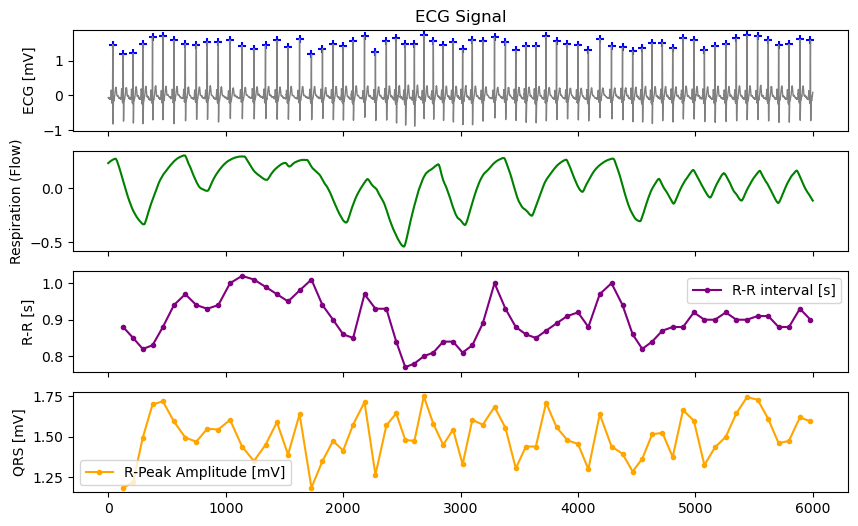

In [18]:
fig, axs = plt.subplots(4, 1, sharex='all', figsize=(10, 6))
axs[0].plot(k, y_ecg, lw=1.0, color='gray')
axs[0].scatter(ind_peaks, y_ecg[ind_peaks], c='b', marker='+')
axs[0].set_title("ECG Signal")
axs[0].set_ylabel('ECG [mV]')

axs[1].plot(k, y_resp, 'g-', label='Respiration')
axs[1].set_ylabel('Respiration (Flow)')

axs[2].plot(ind_peaks[1:], rr_interval_in_s, '.-', color='purple', label='R-R interval [s]')
axs[2].set_ylabel('R-R [s]')
axs[2].legend()

axs[3].plot(ind_peaks[1:], y_QRS, '.-', color='orange', label='R-Peak Amplitude [mV]')
axs[3].set_ylabel('QRS [mV]')
axs[3].legend()
plt.show()

### 1 Panel ECG
**ECG Signal**, shows the electrical activity of the heart.

**Blue Markers**, detected R-Peaks of the QRS (Ventricular depolarization)

### 2 Panel Respiration
**Wave** represents the breathing cycle of the sample (inhalation & exhalation)

**Purpose**: heart rate increases during inhalation and decreases during exhalation

### Panel 3 RR-Interval
**Wave** time difference between two consecutives R-Peaks

**Purpose** provides insights into autonomic nervous system activity and cardiovascular health


### Panel 4 QRS Amplitude
**Wave** shows the amplitudes of the QRS complex at detected R-Peaks

**Purpose** the QRS amplitude is often used to assess the strength of ventricular contraction or detect abnormalities in heart's electrical activity

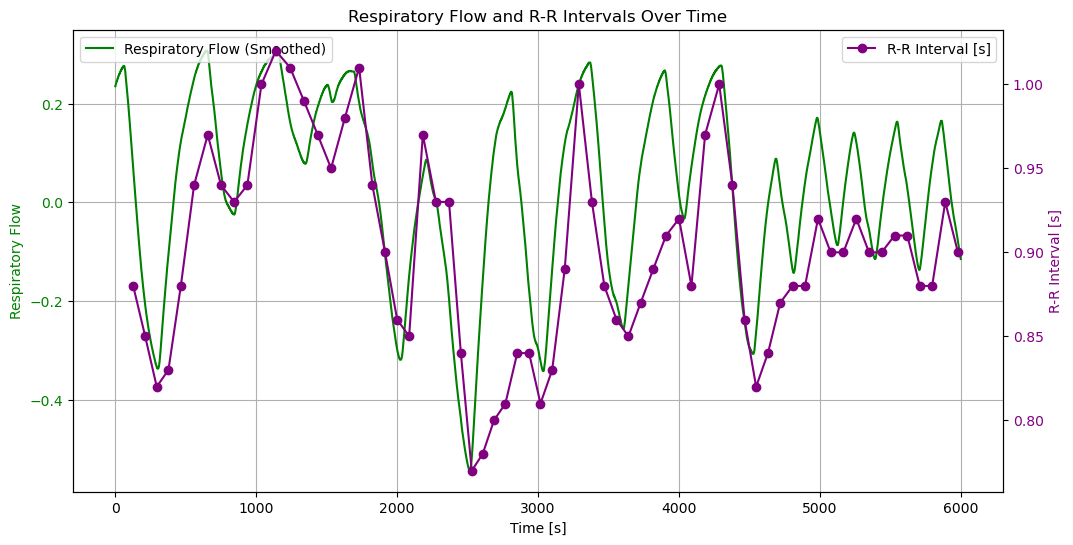

In [40]:
# Plot only the respiratory flow and R-R intervals
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the respiratory flow on the primary y-axis
ax1.plot(k, y_resp, label='Respiratory Flow (Smoothed)', color='green')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Respiratory Flow', color='green')
ax1.legend(loc='upper left')
ax1.tick_params(axis='y', labelcolor='green')
ax1.grid()

# Plot R-R intervals on the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(ind_peaks[1:], rr_interval_in_s, 'o-', color='purple', label='R-R Interval [s]')
ax2.set_ylabel('R-R Interval [s]', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.legend(loc='upper right')

# Title and overall plot settings
plt.title('Respiratory Flow and R-R Intervals Over Time')
plt.show()

# Exercise 1-2: ECG vs. Breathing

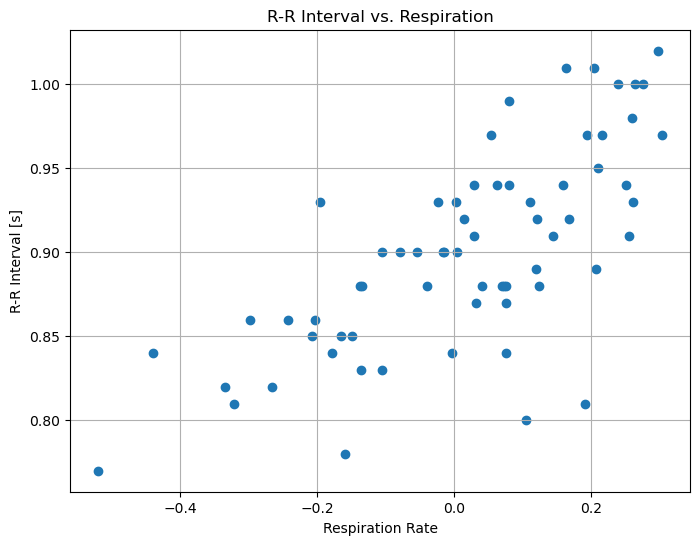

In [21]:
resp_at_rr = y_resp[ind_peaks[1:]]

# Simple scatter plot of R-R interval vs. respiration at R peak times
plt.figure(figsize=(8, 6))
plt.scatter(resp_at_rr, rr_interval_in_s)

# Labels and title
plt.xlabel('Respiration Rate')
plt.ylabel('R-R Interval [s]')
plt.title('R-R Interval vs. Respiration')
plt.grid(True)
plt.show()

In [22]:
# linear regression
# x-values are the respiration values (resp_at_rr), y-values are the R-R intervals (rr_interval_in_s).

from scipy.stats import linregress

slope, intercept, r_value, p_value, std_error = linregress(resp_at_rr, rr_interval_in_s) # Calculate the linear regression
print("Slope: " + str(slope))
print("Intercept: " + str(intercept))
print("R-Value: " + str(r_value))
print("P-Value: " + str(p_value))
print("STD Error: " + str(std_error))

Slope: 0.22403276883896822
Intercept: 0.8963000648782656
R-Value: 0.7080134252087623
P-Value: 2.965662696088793e-11
STD Error: 0.027932328978557863


slope, intercept, r_value, _, _ = linregress(resp_at_rr, rr_interval_in_s)

**slope**: The "steepness" of the line (how much y changes as x changes).

**intercept**: Where the line crosses the y-axis when x = 0.

**r_value**: The correlation coefficient (R-value), which tells us how strongly x and y are related. If it’s close to 1 or -1, there's a strong relationship. If it’s close to 0, there's little or no linear relationship.

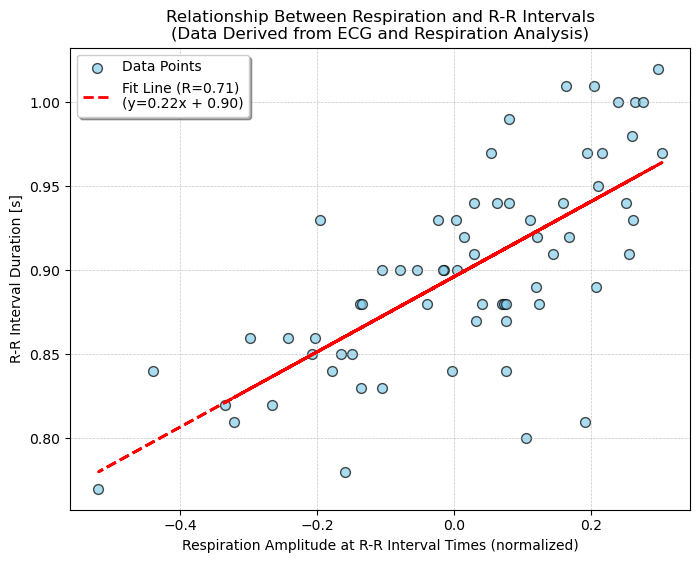

In [23]:
plt.figure(figsize=(8, 6))

# Scatter plot with enhanced markers
plt.scatter(resp_at_rr, rr_interval_in_s, color='skyblue', s=50, alpha=0.7, edgecolor='black', label='Data Points')

# Linear regression line
plt.plot(resp_at_rr, slope * resp_at_rr + intercept, color='red', linestyle='--', linewidth=2, label=f'Fit Line (R={r_value:.2f})\n(y={slope:.2f}x + {intercept:.2f})')

# Labels and title
plt.xlabel('Respiration Amplitude at R-R Interval Times (normalized)')
plt.ylabel('R-R Interval Duration [s]')
plt.title('Relationship Between Respiration and R-R Intervals\n(Data Derived from ECG and Respiration Analysis)')

# Grid and legend
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(loc='upper left', fontsize=10, frameon=True, shadow=True)

# Show the plot
plt.show()

Slope: 0.1375911872433881
Intercept: 1.5022731152409803
R-Value: 0.18533343877202338
P-Value: 0.13626940895025494
STD Error: 0.09119206718113497


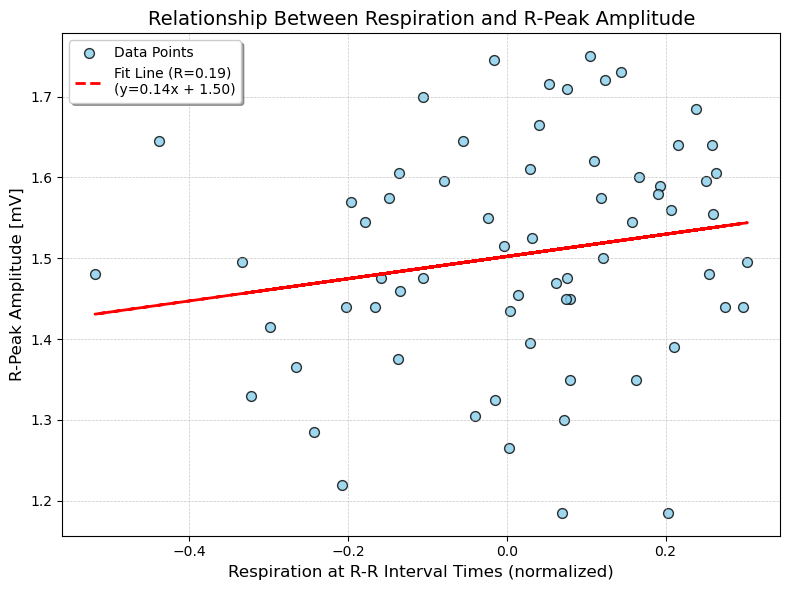

In [25]:
# linear regression
# x-values are the respiration values (resp_at_rr), y-values are the QRS amplidutes (y_QRS).

# resp_at_rr, respiration at rr-peak
# y_QRS, R-Peak amplitude

# Calculate the linear regression
slope2, intercept2, r_value2, p_value2, std_error2 = linregress(resp_at_rr, y_QRS)
print("Slope: " + str(slope2))
print("Intercept: " + str(intercept2))
print("R-Value: " + str(r_value2))
print("P-Value: " + str(p_value2))
print("STD Error: " + str(std_error2))



plt.figure(figsize=(8, 6))

# Scatter plot
slope2, intercept2, r_value2, _, _ = linregress(resp_at_rr, y_QRS)
plt.scatter(resp_at_rr, y_QRS, color='skyblue', s=50, alpha=0.8, edgecolor='black', label='Data Points')

# Add a linear regression line
plt.plot(resp_at_rr, slope2 * resp_at_rr + intercept2, color='red', linestyle='--', linewidth=2,
         label=f'Fit Line (R={r_value2:.2f})\n(y={slope2:.2f}x + {intercept2:.2f})')

# Labels and title
plt.xlabel('Respiration at R-R Interval Times (normalized)', fontsize=12)
plt.ylabel('R-Peak Amplitude [mV]', fontsize=12)
plt.title('Relationship Between Respiration and R-Peak Amplitude', fontsize=14)

# Add grid
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Customize legend
plt.legend(loc='upper left', fontsize=10, frameon=True, shadow=True)

# Show the plot
plt.tight_layout()
plt.show()

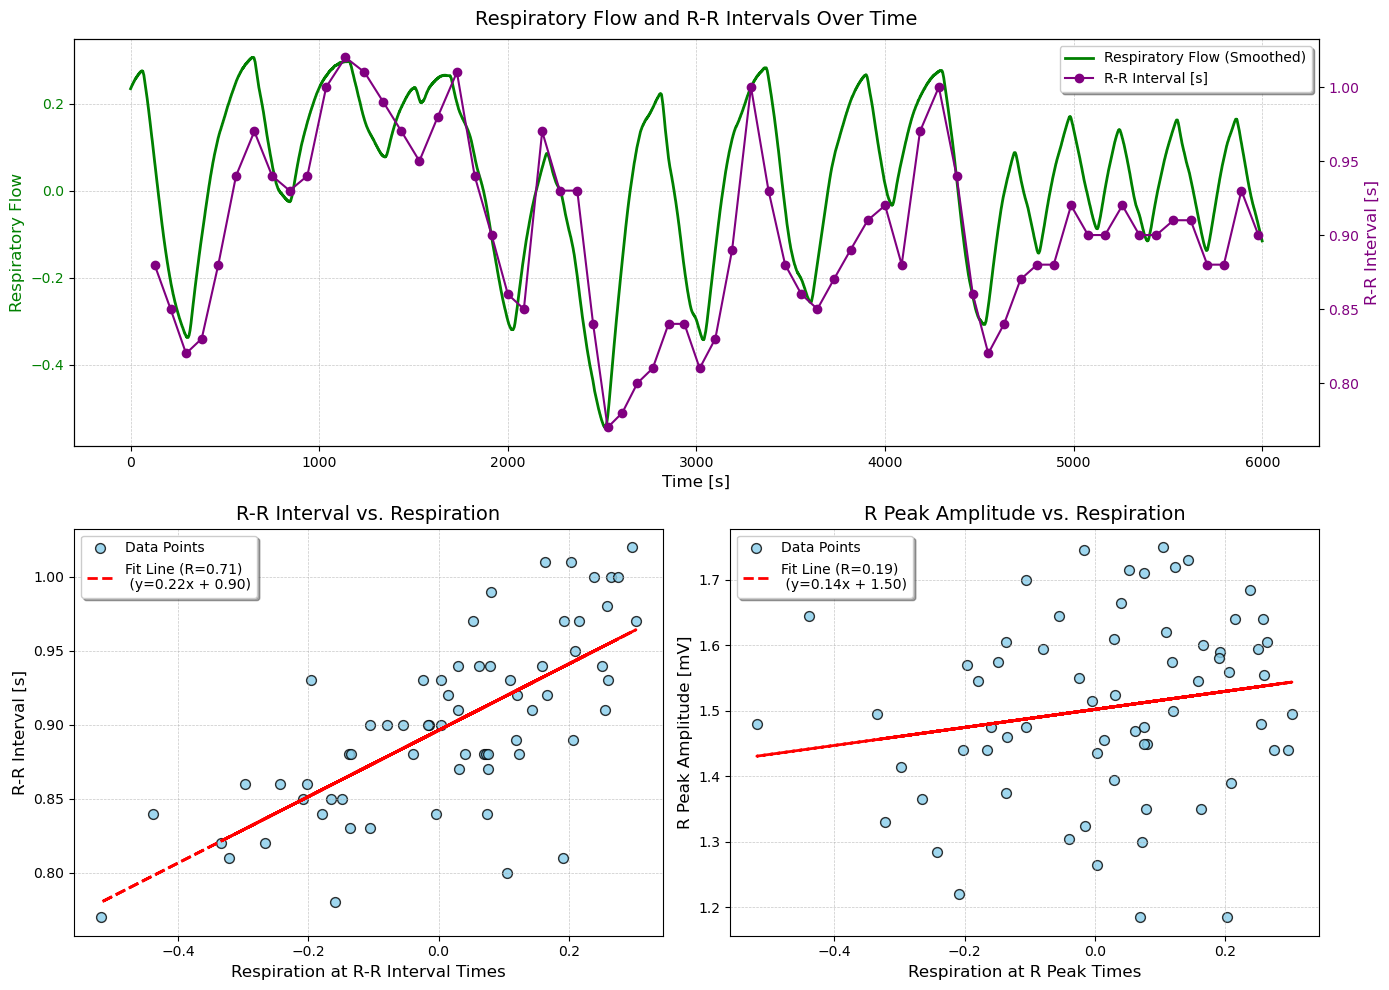

In [28]:
# Create a large figure
fig = plt.figure(figsize=(14, 10))

# 1. Top plot: Respiratory flow and R-R intervals
ax1 = fig.add_subplot(211)  # Takes up the top half of the figure
ax1.plot(k, y_resp, label='Respiratory Flow (Smoothed)', color='green', linewidth=2)
ax1.set_xlabel('Time [s]', fontsize=12)
ax1.set_ylabel('Respiratory Flow', color='green', fontsize=12)
ax1.tick_params(axis='y', labelcolor='green')
ax1.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# R-R intervals on the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(ind_peaks[1:], rr_interval_in_s, 'o-', color='purple', label='R-R Interval [s]', markersize=6)
ax2.set_ylabel('R-R Interval [s]', color='purple', fontsize=12)
ax2.tick_params(axis='y', labelcolor='purple')

# Title for the top plot
ax1.set_title('Respiratory Flow and R-R Intervals Over Time', fontsize=14, pad=10)

# Add legend for the secondary y-axis
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right', fontsize=10, frameon=True, shadow=True)

# 2. Bottom left plot: R-R interval vs. respiration at R peak times
ax3 = fig.add_subplot(223)  # Bottom left plot
ax3.scatter(resp_at_rr, rr_interval_in_s, color='skyblue', s=50, alpha=0.8, edgecolor='black', label='Data Points')

# Add linear regression line
slope, intercept, r_value, _, _ = linregress(resp_at_rr, rr_interval_in_s)
ax3.plot(resp_at_rr, slope * resp_at_rr + intercept, color='red', linestyle='--', linewidth=2,
         label=f'Fit Line (R={r_value:.2f}) \n (y={slope:.2f}x + {intercept:.2f})')

# Labels and title for the left bottom plot
ax3.set_xlabel('Respiration at R-R Interval Times', fontsize=12)
ax3.set_ylabel('R-R Interval [s]', fontsize=12)
ax3.set_title('R-R Interval vs. Respiration', fontsize=14)
ax3.legend(loc='upper left', fontsize=10, frameon=True, shadow=True)
ax3.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# 3. Bottom right plot: R peak amplitudes vs. respiration
ax4 = fig.add_subplot(224)  # Bottom right plot
ax4.scatter(resp_at_rr, y_QRS, color='skyblue', s=50, alpha=0.8, edgecolor='black', label='Data Points')

# Add linear regression line
slope2, intercept2, r_value2, _, _ = linregress(resp_at_rr, y_QRS)
ax4.plot(resp_at_rr, slope2 * resp_at_rr + intercept2, color='red', linestyle='--', linewidth=2,
         label=f'Fit Line (R={r_value2:.2f}) \n (y={slope2:.2f}x + {intercept2:.2f})')

# Labels and title for the right bottom plot
ax4.set_xlabel('Respiration at R Peak Times', fontsize=12)
ax4.set_ylabel('R Peak Amplitude [mV]', fontsize=12)
ax4.set_title('R Peak Amplitude vs. Respiration', fontsize=14)
ax4.legend(loc='upper left', fontsize=10, frameon=True, shadow=True)
ax4.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# Interpretation
## 1. R-R Interval and Heart Rate Variability (HRV)

**Observation:**

* The R-R intervals vary significantly over time (top panel, purple line), with a mean R-R interval around 0.9 seconds, corresponding to a heart rate of approximately 60 / 0.9 ≈ 67bpm (beats per minute).
* The strong positive correlation (R=0.71) between R-R intervals and respiratory flow suggests normal respiratory sinus arrhythmia (RSA).

* Health: High HRV and a clear RSA are typically associated with good cardiovascular health and a well-functioning autonomic nervous system.
* Age: RSA tends to diminish with age. The clear RSA in this plot suggests that the individual may be relatively young or middle-aged.
* Gender: RSA is often more pronounced in females than males, although this is not definitive.

## 2. Respiratory Flow
**Observation:**

The respiratory flow (green line) shows a regular and consistent breathing pattern with moderate amplitude, suggesting normal breathing mechanics.
Insights:

Health: Normal respiratory patterns imply good respiratory health and no apparent signs of respiratory distress. Any deviations (e.g., irregular breathing or apnea) would suggest underlying respiratory or cardiac issues.
Age: Breathing regularity and consistent amplitude are often observed in younger, healthy individuals, whereas older adults might have more irregular patterns due to reduced lung compliance or obstructive conditions.
Gender: Respiratory patterns alone cannot reliably indicate gender.




# Literature
https://pmc.ncbi.nlm.nih.gov/articles/PMC7796076/#:~:text=Nowadays%2C%20it%20is%20well%20known,decelerates%20during%20exhalation%20%5B15%5D.

Nowadays, it is well known that respiration-induced ECG variations are caused by (1) Respiratory Sinus Arrhythmia (RSA) that refers to the cyclic variation that the heart rate accelerates during inhalation and decelerates during exhalation [15]. 